---
# Simulation of least squares regression

The goal of the this exercise is to learn simulation i.e. generate a model with knowledge of true parameters and evaluate an estimation method by comparing the estimated coefficients with true parameters. 

In this notebook, we simulate some dataset generated from a linear regression model where we know the population parameters. 
We then estiamte the parameters using least square method. We then compare the performance of the estimates with population parameters. 






**Task-1** :  Our goal is to write code to simulate 100 data points from the following model:

$$X \sim Uniform(A=-2, B=2)$$
$$\epsilon \sim N(\mu=0,\sigma=2)$$
$$Y=2+3X+\epsilon$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
# Set random seed
np.random.seed(206)

# Define the parameters
A = -2
B = 2
mu = 0
sigma = 2

# Simulate X and epsilon
X = np.random.uniform(low=A, high=B, size=100)
epsilon = np.random.normal(loc=mu, scale=sigma, size=100)
Y = 2 + 3*X + epsilon

# Show the output
print("X = ", X)
print("Y = ", Y)



X =  [-0.29070303 -0.06043533 -1.81709475  0.32683111  1.53961992  0.49524875
 -1.31241543  0.67385421 -0.19299883 -0.98045583  1.74360943 -0.13812515
 -0.68456544 -1.07433566 -1.936836   -1.21122123  1.0170794  -0.79484008
  0.76725838  0.26102679 -0.96156805 -0.09402309  0.69927132 -0.21775251
 -0.96307019 -0.82063594 -0.18100144 -1.03360105 -0.5730787   0.06615195
  0.69818066 -1.25395841  0.39789342 -0.95123259 -0.07757703  0.55089312
 -0.11134398 -1.75473383  1.13809499 -1.40453244 -1.28934016  1.30193963
  0.37444165 -1.1983074  -1.10321718 -1.58419396  0.69711125  0.70972631
  1.61551519 -1.25248443  1.72443798 -1.08793687 -1.40319653 -0.18621993
  0.12253961 -0.55966455  1.51140075  0.07659723  0.02409268  1.17430842
 -0.0108159   0.63226256  1.82390846 -0.31826676  0.24709254  0.33804986
 -1.73956433  1.41073356 -0.91043132 -0.42113416 -1.00323411 -1.93420904
  0.72679598  1.42029043 -0.51803233 -0.88138825  0.73563052  0.89098867
  1.39825513  0.80093018 -1.21079472  1.874347

---
**Task-2**: Use `matplotlib` to draw a scatter plot of the 100 data points $(x_0, y_0), \cdots, (x_{100}, y_{100})$. Add the polulation regression line $Y=2+3X$ in red color.

Add proper axis labels, a title, etc.

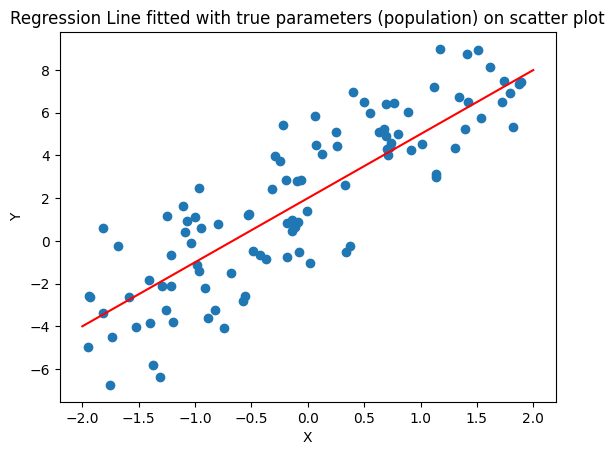

In [3]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed
np.random.seed(206)

# Generate the data
X = np.random.uniform(-2, 2, 100)
eps = np.random.normal(0, 2, 100)
Y = 2 + 3*X + eps

# Calculate the population regression line
#creates an array of 100 evenly spaced X values from -2 to 2
# calculating corresponding values of Y using the equation Y= 2 + 3*X
X_line = np.linspace(-2, 2, 100)
Y_line = 2 + 3*X_line

# Create scatter plot
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line fitted with true parameters (population) on scatter plot')

#show the scatterplot
plt.show()


---
**Task-3**: Now, we use `scipy.optimize.curve_fit()` to fit a least squares regression $Y = \beta_0 + \beta_1 X$ to the simulated data.

The expected estimates are $\hat{\beta_0}$=1.8914943777278204 and $\hat{\beta_1}$=2.87327463881861.


In [4]:
# ANSWER
import numpy as np
from scipy.optimize import curve_fit

# Simulated data
np.random.seed(206) #setting random seed
X = np.random.uniform(-2, 2, 100) #generate 100 random values between -2 and 2
epsilon = np.random.normal(0, 2, 100) #100 normally distributed random errors,mean=0 & st. dev=2
Y = 2 + 3*X + epsilon #generate the response variable

# Define the linear regression function
def lin_reg(x, b0, b1):
    return b0 + b1*x

# Fit the linear regression model
params, cov = curve_fit(lin_reg, X, Y)

# Extract the coefficients
b0 = params[0]
b1 = params[1]

# Print the coefficients
print("b0 is", b0)
print("b1 is", b1)



b0 is 2.1369304050960203
b1 is 3.1525736646811593


---
 Luckily, we have the analytical solution of the least squares regression $Y = \beta_0 + \beta_1 X + \epsilon$, which is

$$ 
\begin{aligned}
 \hat{\beta_1} & = 
 \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
 {\sum_{i=1}^{n} (x_i - \bar{x})^2} \\
 \hat{\beta_0} & = \bar{y} - \hat{\beta_1} \bar{x}
\end{aligned} 
$$

**Task-4**: We write code to calculate $\hat{\beta_0}$ and $\hat{\beta_1}$ using the above equations. Then we compare our results with the coefficients calculated by the `scipy.optimize.curve_fit()` function in part (c). 

In [5]:
# ANSWER
# calculate the mean of X and Y 
x_bar = np.mean(X)
y_bar = np.mean(Y)

#calculate the estimated slope of the regression line
beta1_hat= np.sum((X - x_bar) * (Y - y_bar)) / np.sum((X- x_bar)**2)
beta0_hat= y_bar - beta1_hat *x_bar
print("beta0_hat:", beta0_hat)
print("beta1_hat:", beta1_hat)


beta0_hat: 2.1369304017488027
beta1_hat: 3.1525736571448437


We note that the coefficients calculated using the analytical solution are close enough to the coefficients calculated by the curve_fit() function in Task-3.

---
**Task-5**: We redraw a scatter plot of the 100 data points $(x_0, y_0), \cdots, (x_{100}, y_{100})$. We add the polulation regression line $Y=2+3X$ in red color and the least squares fitted line, using the coefficients estimated in task-4, in blue color.


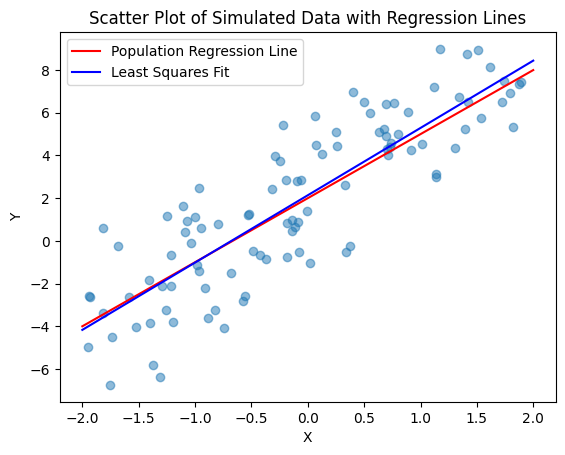

In [6]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(206)
X = np.random.uniform(-2, 2, size=100)
eps = np.random.normal(0, 2, size=100)
Y = 2 + 3 * X + eps

# Calculating mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calculating analytical solution of least squares regression
b1 = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
b0 = y_mean - b1 * x_mean

# Creating array of X values for regression lines
x_reg = np.array([-2, 2])

# Calculating values for population regression line
# assuming the intercept of the population regression line is 2 and slope is 3
y_pop_reg = 2 +3 * x_reg

# Calculate values for least squares fitted line
y_fit_reg =b0 + b1 * x_reg

# Create the scatter plot
plt.scatter(X, Y, alpha=0.5)

# Add the population regression line
plt.plot(x_reg, y_pop_reg, c='red', label='Population Regression Line')

# Add the least squares fitted line
plt.plot(x_reg, y_fit_reg, c='blue', label='Least Squares Fit')

# Add axis labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Simulated Data with Regression Lines')

# Add a legend
plt.legend()

# Show the plot
plt.show()


---
**Task-6** Recall in task-1, we set the random seed to be 206. 
This time, without fixing the random seeds, we repeat the simulation 10 times and draw the 10 least sqaure regression lines (one for each simulation) on the same plot. Also, we add the polulation regression line  $𝑌=2+3𝑋$  in red color. 

<ipython-input-7-934c920e77ce>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


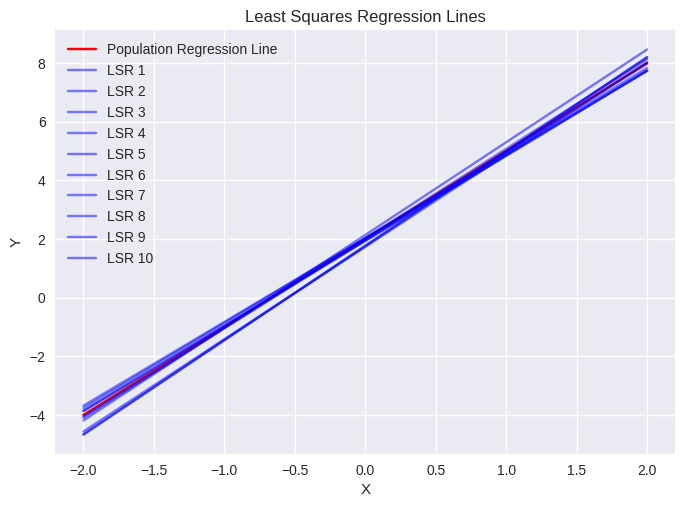

In [7]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt

# firstly, lets define the true parameters for the population model
beta0= 2
beta1= 3

# now the number of data points
n =100

# the range of X
X_min =-2
X_max = 2

# the standard deviation of the noise
sigma = 2

# now define the function to create data
def generate_data(n, X_min, X_max, beta0, beta1, sigma):
    X = np.random.uniform(X_min, X_max, size=n)
    eps = np.random.normal(loc=0, scale=sigma, size=n)
    Y = beta0+ beta1 * X+ eps
    return X, Y

#function to calculate the least squares estimates of beta0 and beta1 is defined
def least_squares_estimate(X, Y):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    beta1_hat = np.sum((X - x_bar) * (Y - y_bar))/ np.sum((X - x_bar)**2)
    beta0_hat = y_bar- beta1_hat * x_bar
    return beta0_hat, beta1_hat

# Set the plot style to give a modern and clean look to the plots. 
plt.style.use('seaborn')

# Create an array of x values for the regression lines
x_reg = np.linspace(X_min, X_max, num=100)

# plot the population regression line with red color
plt.plot(x_reg, beta0 + beta1 * x_reg, 'r-', label='Population Regression Line')

# Plot the least squares regression lines with blue color
for i in range(10):
    X,Y = generate_data(n, X_min, X_max, beta0, beta1, sigma)
    beta0_hat, beta1_hat = least_squares_estimate(X,Y)
    plt.plot(x_reg, beta0_hat + beta1_hat * x_reg, 'b-', alpha=0.5, label=f'LSR {i+1}')

# Label axis and write title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Regression Lines')

# legend addition
plt.legend()

# Show the plot
plt.show()
